In [34]:
import os

directory_path = 'data'

file_names = ['data/'+f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

print("files:")
for file_name in file_names:
    print(file_name)


files:
data/pbn423.tsp
data/xqf131.tsp
data/pma343.tsp
data/xql662.tsp
data/bcl380.tsp
data/pbl395.tsp
data/pbm436.tsp
data/xqg237.tsp
data/pka379.tsp
data/pbk411.tsp


In [35]:
import subprocess

def run_main_with_datapath(datapath):
    command = f"./main {datapath} true"

    try:
        completed_process = subprocess.run(
            command,
            shell=True,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )

        if completed_process.returncode != 0:
            print(f"Command '{command}' failed with return code {completed_process.returncode}")
            exit(1)

        lines = completed_process.stdout.strip().split('\n')

        mst_weight = int(lines[0])
        cycle_weight = int(lines[1])

        avg_10_values = []
        avg_50_values = []

        for line in lines[2:]:
            if line.startswith("avg_10: "):
                avg_10_values.append(float(line.split(": ")[1]))
            elif line.startswith("avg_50: "):
                avg_50_values.append(float(line.split(": ")[1]))

        min_weight = int(lines[-1])

        cycle = completed_process.stderr.strip().split('\n')
        cycle = [(int(x), int(y)) for line in cycle for x, y in [line.split()]]

        return {
            'mst_weight': mst_weight,
            'cycle_weight': cycle_weight,
            'avg_10_values': avg_10_values,
            'avg_50_values': avg_50_values,
            'min_weight': min_weight,
            'cycle': cycle
        }
    except subprocess.CalledProcessError as e:
        print(f"Error running command '{command}': {e}")
        exit(1)
    except Exception as e:
        print(f"An error occurred: {e}")
        exit(1)


In [38]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def visualise_graph(points):
    x, y = zip(*points)
    plt.scatter(x, y, c='blue', marker='o', label='Points', s=15)

    for i in range(len(points) - 1):
        plt.plot([points[i][0], points[i + 1][0]], [points[i][1], points[i + 1][1]], c='red', linestyle='-', linewidth=1)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Wizualizacja ścieżki komiwojażera')

    plt.show()


Plik: data/pbn423.tsp
Waga MST:  1201
Waga cyklu:  2002
Minimalna waga losowej permutacji:  21187


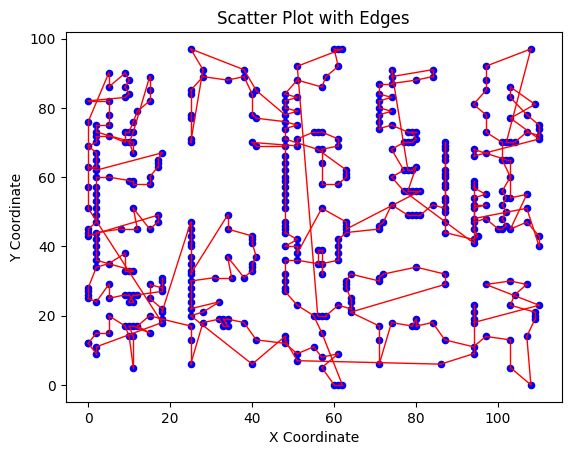

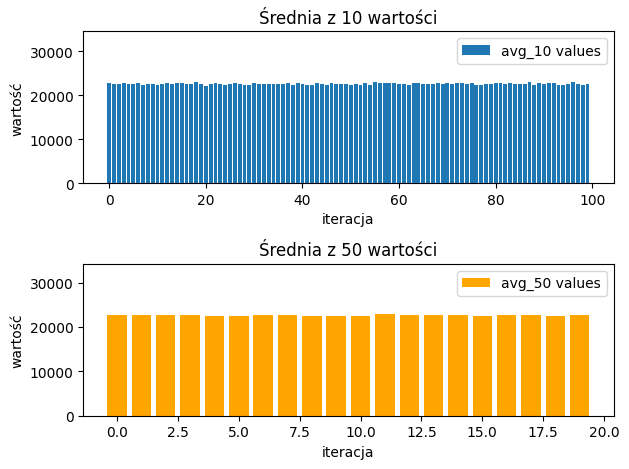

Plik: data/xqf131.tsp
Waga MST:  474
Waga cyklu:  809
Minimalna waga losowej permutacji:  3980


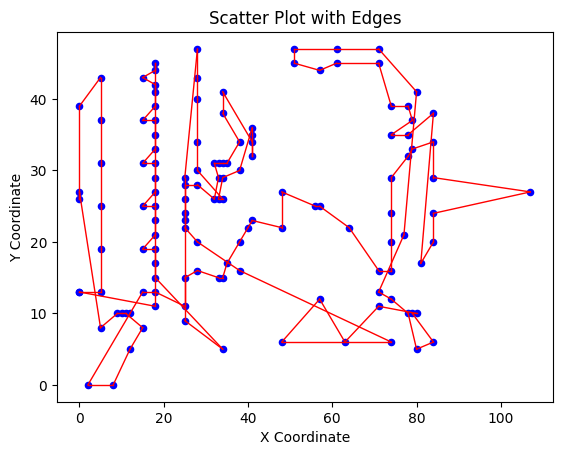

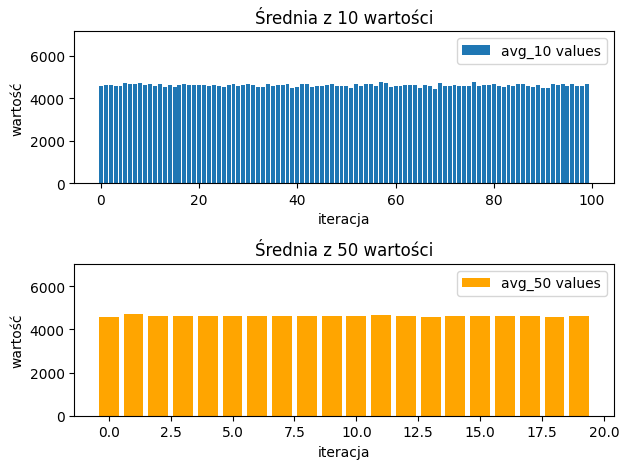

Plik: data/pma343.tsp
Waga MST:  1179
Waga cyklu:  1901
Minimalna waga losowej permutacji:  31941


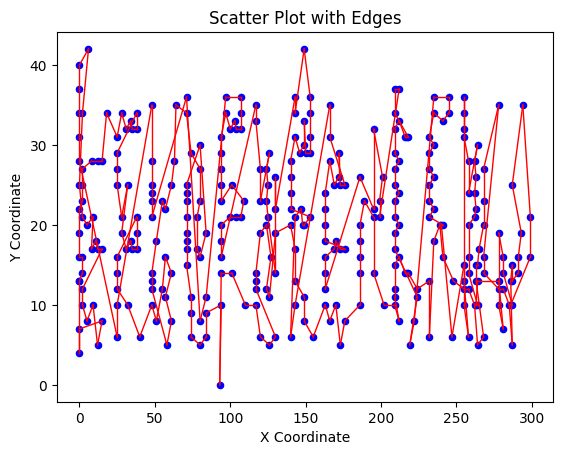

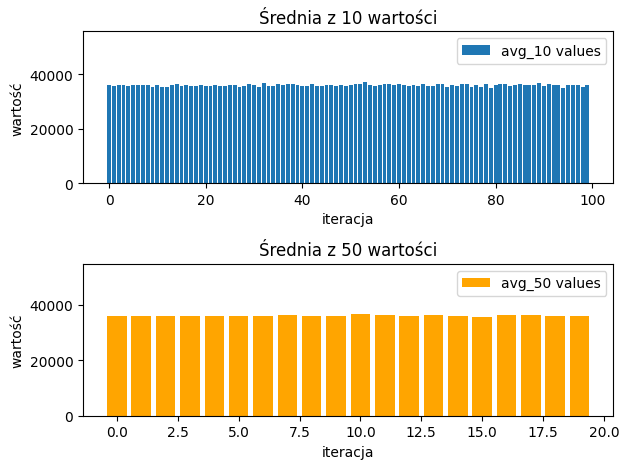

Plik: data/xql662.tsp
Waga MST:  2240
Waga cyklu:  3792
Minimalna waga losowej permutacji:  49777


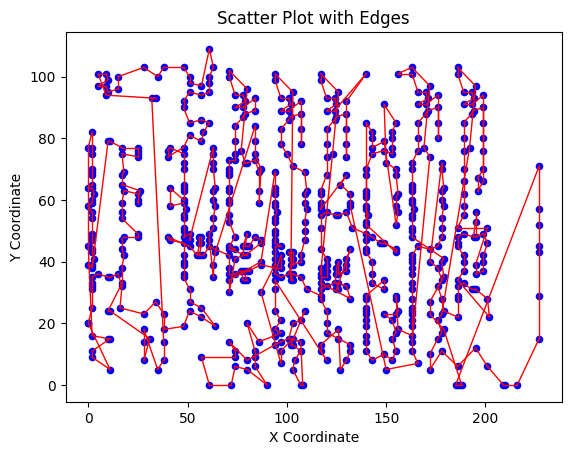

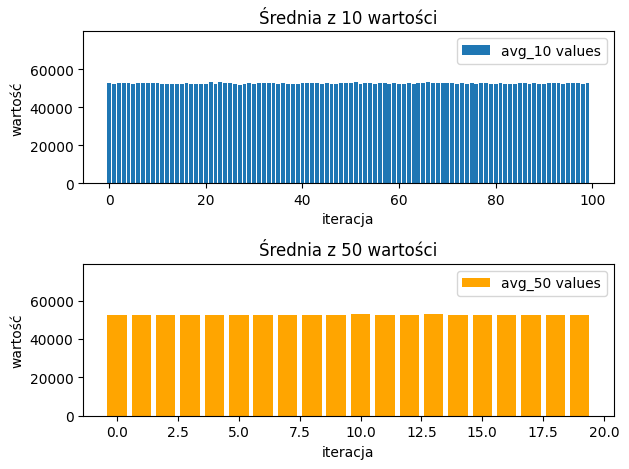

Plik: data/bcl380.tsp
Waga MST:  1444
Waga cyklu:  2340
Minimalna waga losowej permutacji:  23620


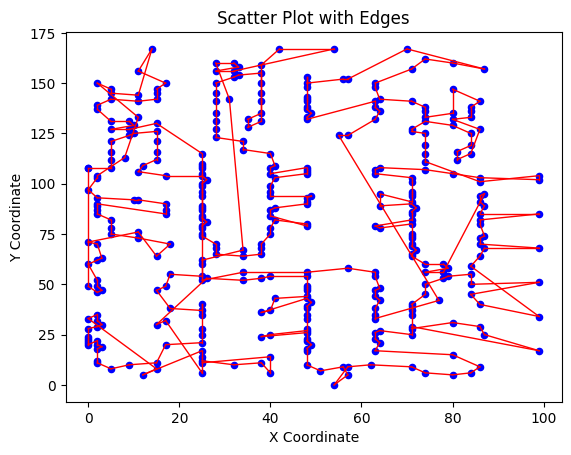

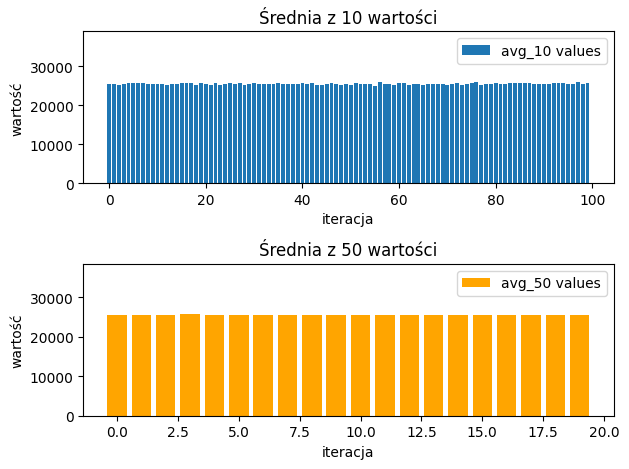

Plik: data/pbl395.tsp
Waga MST:  1124
Waga cyklu:  1908
Minimalna waga losowej permutacji:  18332


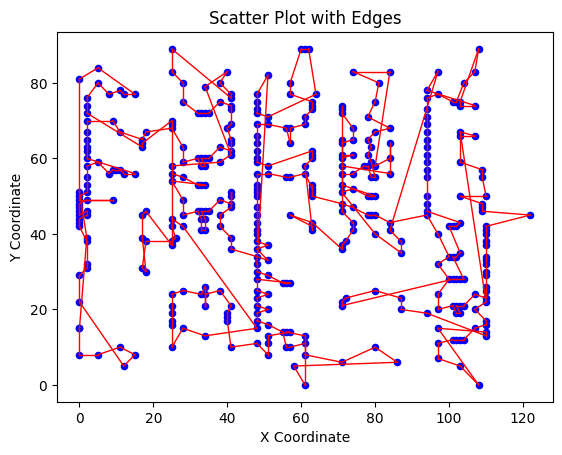

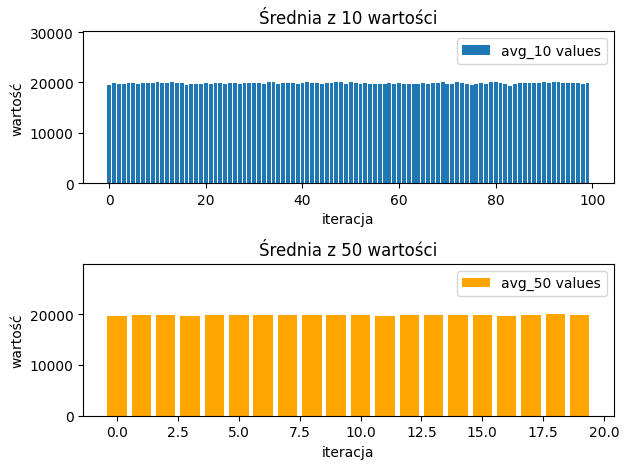

Plik: data/pbm436.tsp
Waga MST:  1269
Waga cyklu:  2134
Minimalna waga losowej permutacji:  21884


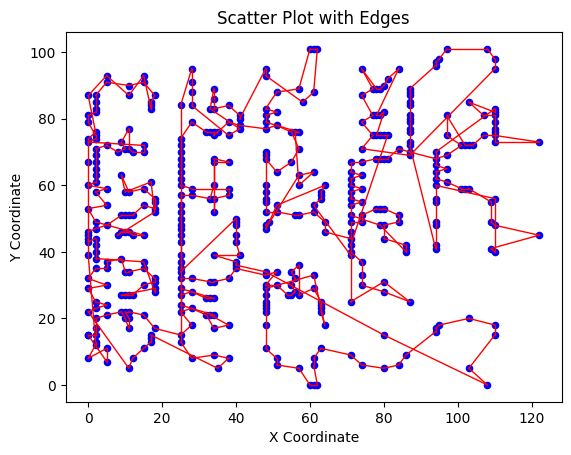

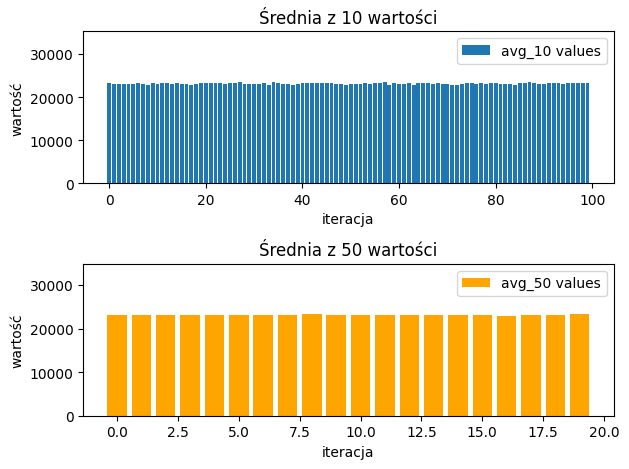

Plik: data/xqg237.tsp
Waga MST:  897
Waga cyklu:  1459
Minimalna waga losowej permutacji:  11186


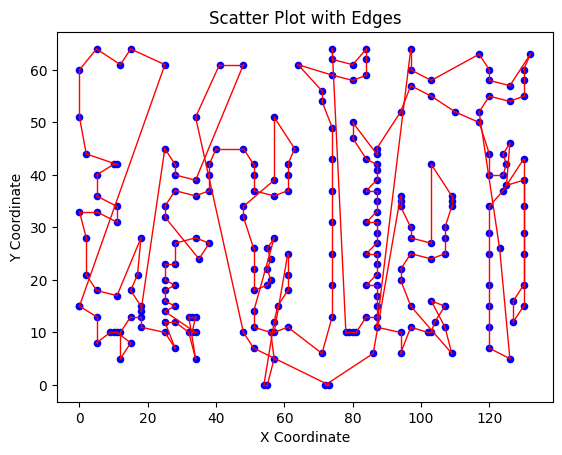

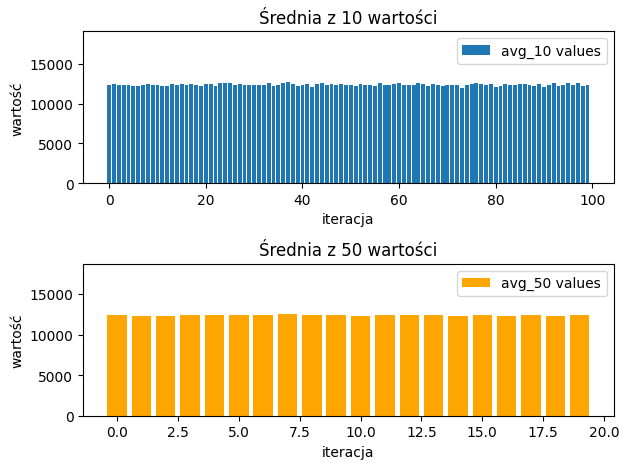

Plik: data/pka379.tsp
Waga MST:  1151
Waga cyklu:  1842
Minimalna waga losowej permutacji:  33163


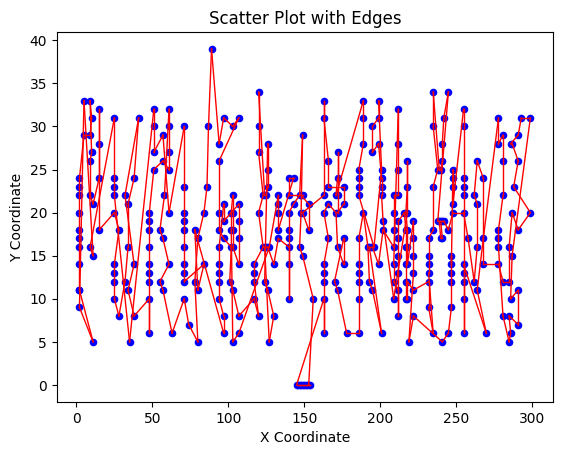

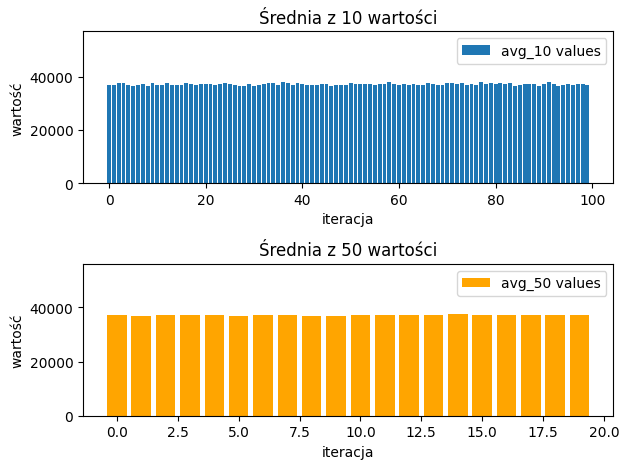

Plik: data/pbk411.tsp
Waga MST:  1180
Waga cyklu:  1945
Minimalna waga losowej permutacji:  20896


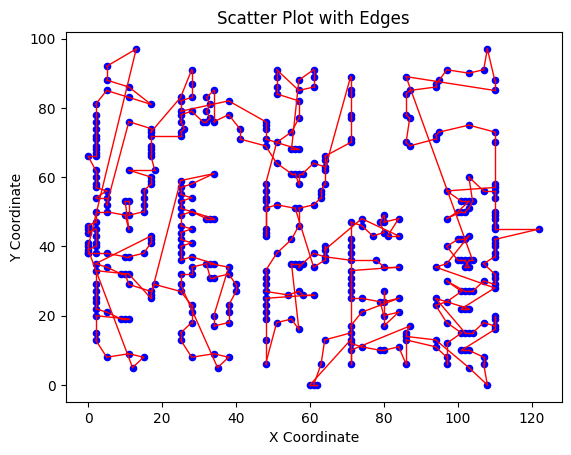

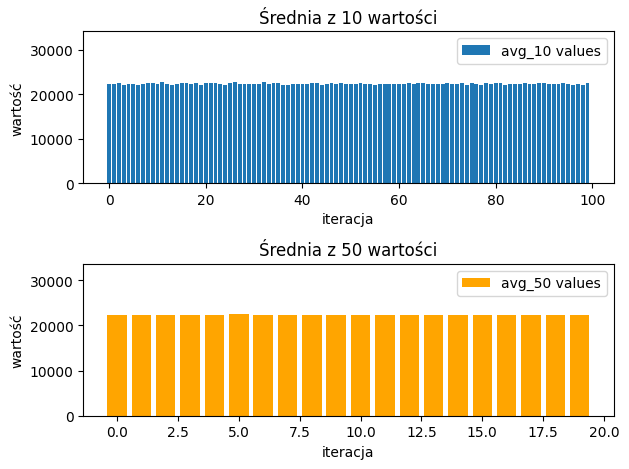

In [39]:
import matplotlib.pyplot as plt
for file in file_names:
    result = run_main_with_datapath(file)
    print(f"Plik: {file}")
    print("Waga MST: ", result['mst_weight'])
    print("Waga cyklu: ", result['cycle_weight'])
    print("Minimalna waga losowej permutacji: ", result['min_weight'])

    visualise_graph(result['cycle'])
    
    avg_10_values = result['avg_10_values']
    avg_50_values = result['avg_50_values']

    fig, axs = plt.subplots(2)

    axs[0].bar(range(len(avg_10_values)), avg_10_values, label='avg_10 values')
    axs[0].set_xlabel('iteracja')
    axs[0].set_ylabel('wartość')
    axs[0].set_title('Średnia z 10 wartości')
    axs[0].legend()
    axs[0].set_ylim(0, max(avg_10_values) * 1.5)

    axs[1].bar(range(len(avg_50_values)), avg_50_values, label='avg_50 values', color='orange')
    axs[1].set_xlabel('iteracja')
    axs[1].set_ylabel('wartość')
    axs[1].set_title('Średnia z 50 wartości')
    axs[1].legend()
    axs[1].set_ylim(0, max(avg_50_values) * 1.5)
    plt.tight_layout()

    plt.show()